#Imports

In [3]:
# Upload do CSV
from google.colab import files
uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (1).csv


In [192]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Modelagem
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Avaliação
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [153]:
# Conversão CSV para DF
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#1

Verificar distribuição das variáveis.

In [154]:
# Tipagem de dados
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [155]:
# Remover a coluna Person ID
df.drop(columns=['Person ID'], inplace=True)

In [156]:
# Resumo estatístico das colunas numéricas
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


#2

Quais variáveis mais se correlacionam com a qualidade do
sono?

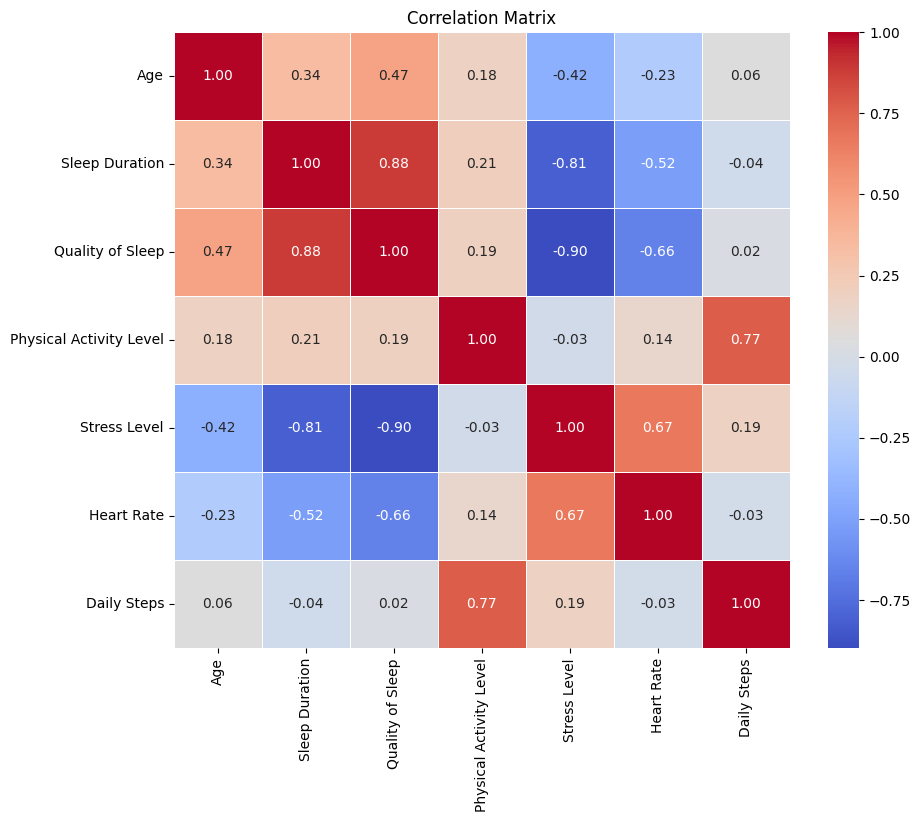

In [157]:
# Matriz de Correlação
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#3

Existem diferenças de padrão entre homens e mulheres? E
entre faixas etárias?

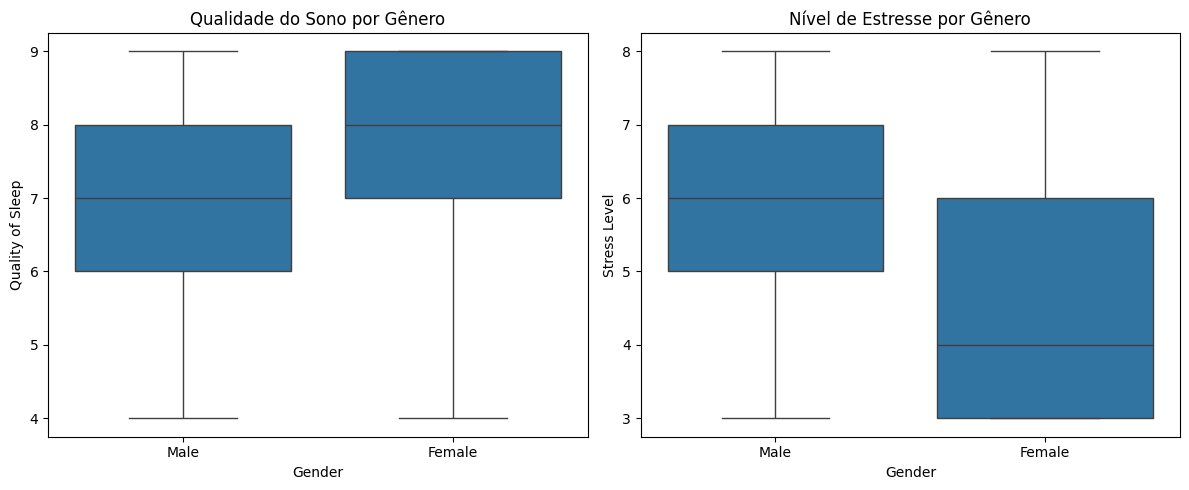

In [158]:
# Boxplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='Gender', y='Quality of Sleep', ax=axes[0])
axes[0].set_title('Qualidade do Sono por Gênero')

sns.boxplot(data=df, x='Gender', y='Stress Level', ax=axes[1])
axes[1].set_title('Nível de Estresse por Gênero')

plt.tight_layout()
plt.show()

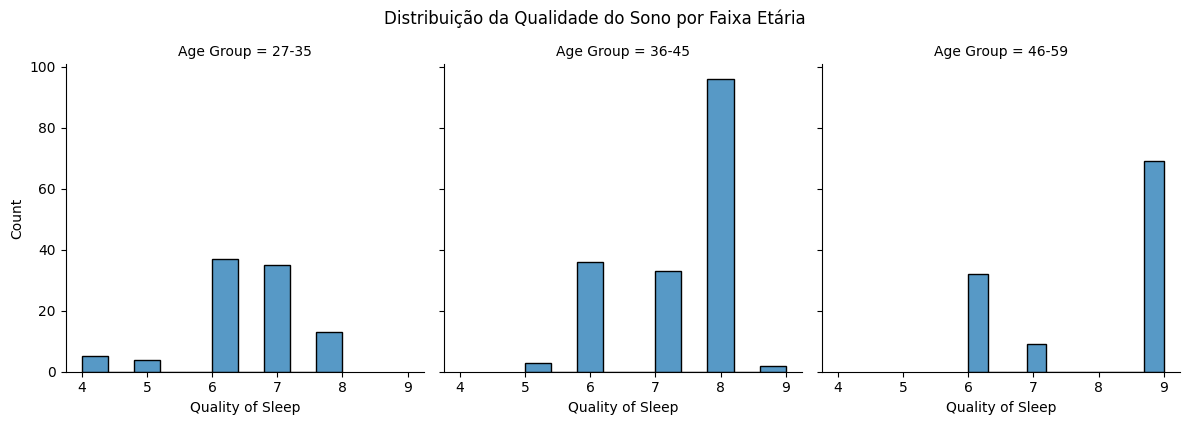

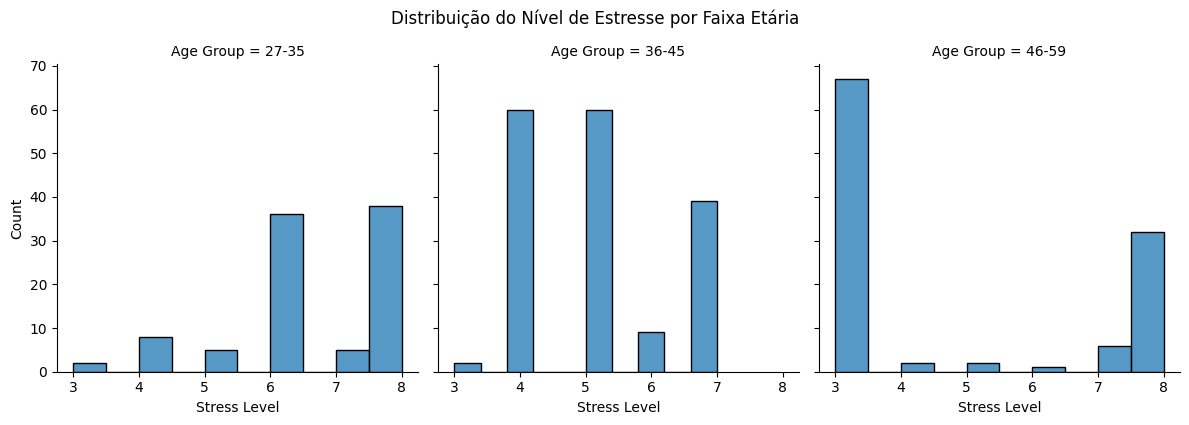

In [159]:
# Gráfico de colunas
bins = [26, 35, 45, 59]
labels = ['27-35', '36-45', '46-59']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

g1 = sns.FacetGrid(df, col="Age Group", col_wrap=3, height=4)
g1.map_dataframe(sns.histplot, x="Quality of Sleep", bins=10, kde=False)
g1.fig.suptitle('Distribuição da Qualidade do Sono por Faixa Etária', y=1.05)
plt.show()

g2 = sns.FacetGrid(df, col="Age Group", col_wrap=3, height=4)
g2.map_dataframe(sns.histplot, x="Stress Level", bins=10, kde=False)
g2.fig.suptitle('Distribuição do Nível de Estresse por Faixa Etária', y=1.05)
plt.show()

#4



1.   Tratar dados faltantes, se houver
2.    Codificar variáveis categóricas e normalizar dados numéricos.



In [169]:
# Verificar dados ausentes
print("Dados ausentes por coluna:")
print(df.isnull().sum())

Dados ausentes por coluna:
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Age Group                  0
dtype: int64


In [170]:
# Preenche NaNs com 'Unknown' para não perder dados
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("Unknown")

In [171]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Group
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Unknown,27-35
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Unknown,27-35
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Unknown,27-35
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,27-35
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,27-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,46-59
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,46-59
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,46-59
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,46-59


#5

Criar um modelo de classificação (ex: Random Forest, Logistic
Regression, etc.).

In [175]:
# Criar a variável alvo categórica
def classificar_sono(score):
    if score <= 4:
        return "Ruim"
    elif score <= 6:
        return "Moderada"
    else:
        return "Boa"

df["Qualidade_Sono_Label"] = df["Quality of Sleep"].apply(classificar_sono)

In [176]:
# Separar pressão arterial
bp_split = df["Blood Pressure"].str.split("/", expand=True)
df["Systolic_BP"] = pd.to_numeric(bp_split[0])
df["Diastolic_BP"] = pd.to_numeric(bp_split[1])
df.drop(columns=["Blood Pressure"], inplace=True)

In [196]:
# Codificar as variáveis categóricas
X = pd.get_dummies(df.drop(columns=["Quality of Sleep", "Qualidade_Sono_Label"]), drop_first=True)
y = df["Qualidade_Sono_Label"]

# Codificar os rótulos em números
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Padronizar os dados numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [201]:
# Treinar o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Avaliar
y_pred = model.predict(X_test_scaled)

print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Acurácia: 1.0
              precision    recall  f1-score   support

         Boa       1.00      1.00      1.00        46
    Moderada       1.00      1.00      1.00        27
        Ruim       1.00      1.00      1.00         2

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [203]:
# Acurácia no treino
y_train_pred = model.predict(X_train_scaled)
print("Acurácia treino:", accuracy_score(y_train, y_train_pred))

Acurácia treino: 1.0


In [204]:
# Validação cruzada
scores = cross_val_score(model, X, y_encoded, cv=5)
print("Acurácia CV média:", scores.mean())

Acurácia CV média: 0.9706666666666667


In [207]:
# Criar o modelo Logistic Regression
model_lr = LogisticRegression(max_iter=1000, random_state=42)

# Treinar
model_lr.fit(X_train_scaled, y_train)

# Prever
y_pred_lr = model_lr.predict(X_test_scaled)

# Avaliar
print("Acurácia Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

Acurácia Logistic Regression: 0.9866666666666667
              precision    recall  f1-score   support

         Boa       1.00      1.00      1.00        46
    Moderada       0.96      1.00      0.98        27
        Ruim       1.00      0.50      0.67         2

    accuracy                           0.99        75
   macro avg       0.99      0.83      0.88        75
weighted avg       0.99      0.99      0.98        75



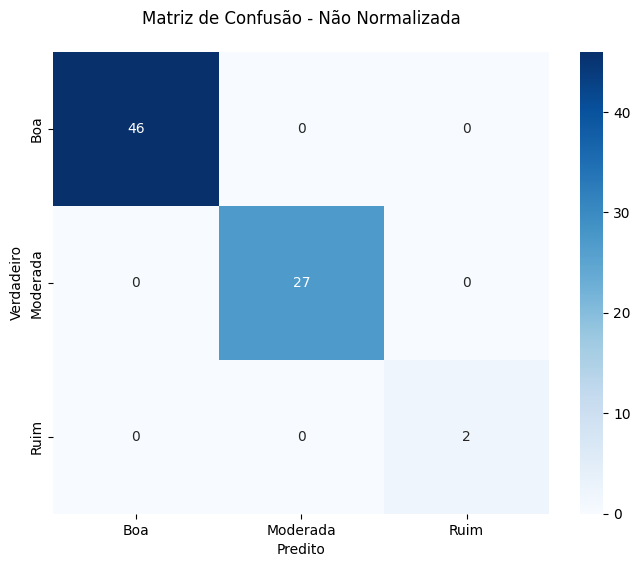

In [223]:
# Matriz de Confusão - Não Normalizada
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Boa', 'Moderada', 'Ruim'],
            yticklabels=['Boa', 'Moderada', 'Ruim'])
plt.title('Matriz de Confusão - Não Normalizada', pad=20)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

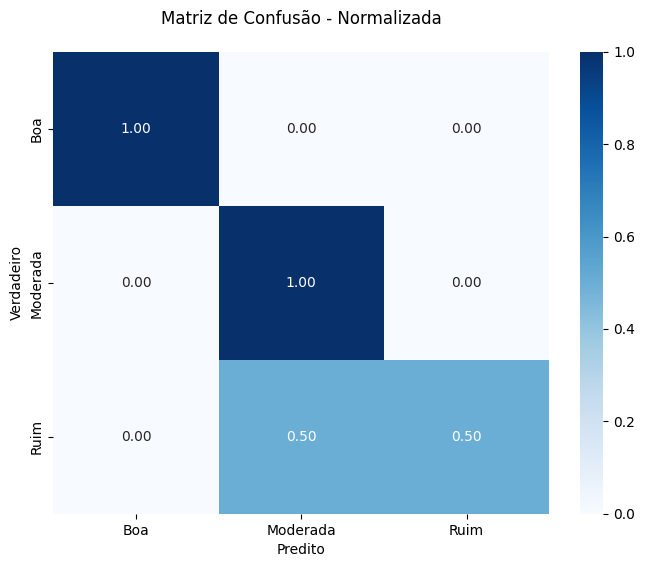

In [225]:
# Matriz de Confusão - Normalizada
cm = confusion_matrix(y_test, y_pred_lr, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.title('Matriz de Confusão - Normalizada', pad=20)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

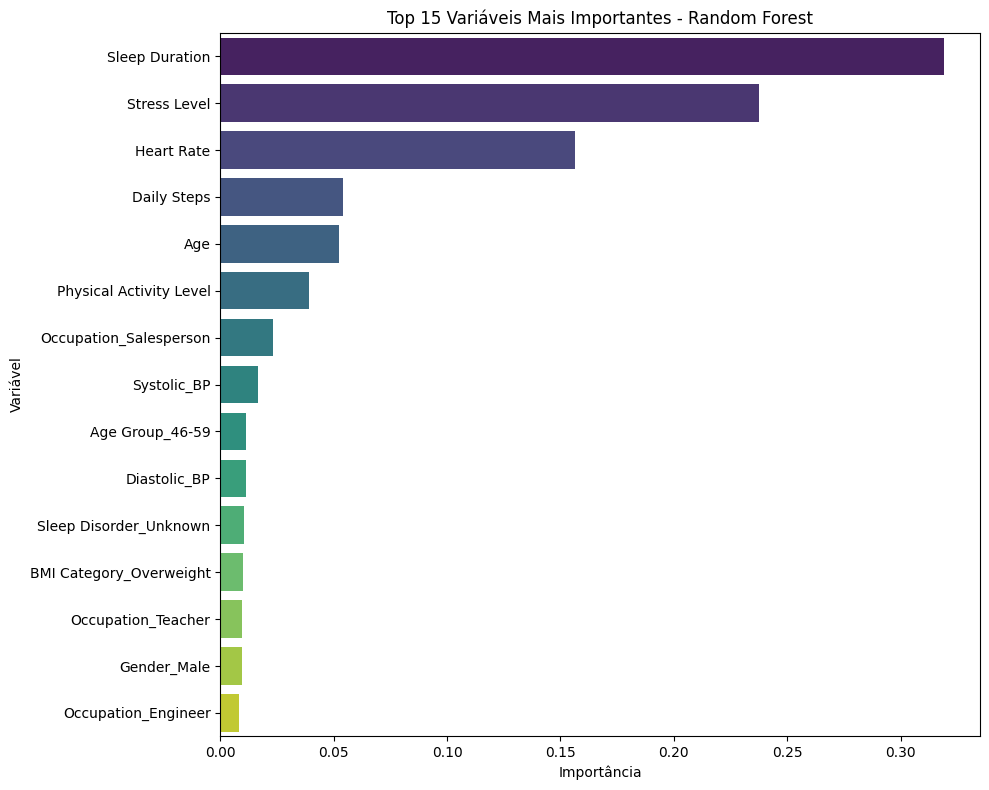

In [231]:
# Gráfico das variáveis mais importantes
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title('Top 15 Variáveis Mais Importantes - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()